In [2]:
import numpy as np
import pandas as pd

In [19]:
df = pd.read_csv(r'train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df['number'] = df['SibSp'] + df['Parch']

In [21]:
df = df[['Cabin', 'Ticket', 'Survived','number']]

In [22]:
df = df.head(100)

In [23]:
df.loc[0, 'number'] = 'A'

C:\Users\saqli\AppData\Local\Temp\ipykernel_20080\1087478308.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'A' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[0, 'number'] = 'A'


In [24]:
df

,Cabin,Ticket,Survived,number
0,NaN,A/5 21171,0,A
1,C85,PC 17599,1,1
2,NaN,STON/O2. 3101282,1,0
3,C123,113803,1,1
4,NaN,373450,0,0
...,...,...,...,...
95,NaN,374910,0,0
96,A5,PC 17754,0,0
97,D10 D12,PC 17759,1,1
98,NaN,231919,1,1


In [25]:
df['Numerical_Number'] = pd.to_numeric(df['number'], errors = 'coerce', downcast = 'integer')

In [26]:
df

,Cabin,Ticket,Survived,number,Numerical_Number
0,NaN,A/5 21171,0,A,NaN
1,C85,PC 17599,1,1,1.0
2,NaN,STON/O2. 3101282,1,0,0.0
3,C123,113803,1,1,1.0
4,NaN,373450,0,0,0.0
...,...,...,...,...,...
95,NaN,374910,0,0,0.0
96,A5,PC 17754,0,0,0.0
97,D10 D12,PC 17759,1,1,1.0
98,NaN,231919,1,1,1.0


In [27]:
df['Categorical_Number'] = np.where(df['Numerical_Number'].isnull(), df['number'], np.nan)

In [28]:
df

,Cabin,Ticket,Survived,number,Numerical_Number,Categorical_Number
0,NaN,A/5 21171,0,A,NaN,A
1,C85,PC 17599,1,1,1.0,NaN
2,NaN,STON/O2. 3101282,1,0,0.0,NaN
3,C123,113803,1,1,1.0,NaN
4,NaN,373450,0,0,0.0,NaN
...,...,...,...,...,...,...
95,NaN,374910,0,0,0.0,NaN
96,A5,PC 17754,0,0,0.0,NaN
97,D10 D12,PC 17759,1,1,1.0,NaN
98,NaN,231919,1,1,1.0,NaN


In [29]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12'], dtype=object)

In [31]:
df['cabin_numerical'] = df['Cabin'].str.extract('(\d+)')
df['cabin_categorical'] = df['Cabin'].str[0]

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\saqli\AppData\Local\Temp\ipykernel_20080\2084306207.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['cabin_numerical'] = df['Cabin'].str.extract('(\d+)')


In [32]:
df

,Cabin,Ticket,Survived,number,Numerical_Number,Categorical_Number,cabin_numerical,cabin_categorical
0,NaN,A/5 21171,0,A,NaN,A,NaN,NaN
1,C85,PC 17599,1,1,1.0,NaN,85,C
2,NaN,STON/O2. 3101282,1,0,0.0,NaN,NaN,NaN
3,C123,113803,1,1,1.0,NaN,123,C
4,NaN,373450,0,0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
95,NaN,374910,0,0,0.0,NaN,NaN,NaN
96,A5,PC 17754,0,0,0.0,NaN,5,A
97,D10 D12,PC 17759,1,1,1.0,NaN,10,D
98,NaN,231919,1,1,1.0,NaN,NaN,NaN


<Axes: xlabel='cabin_categorical'>

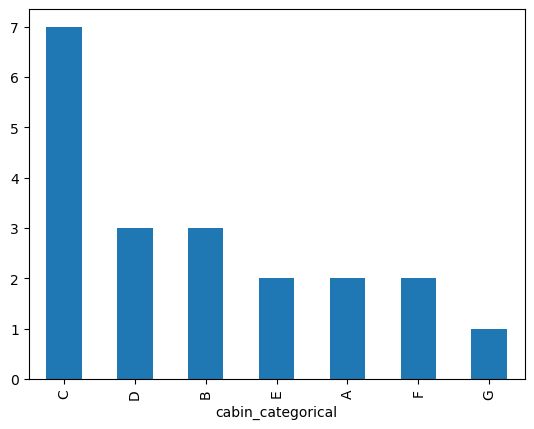

In [36]:
df['cabin_categorical'].value_counts().plot(kind = 'bar')

In [39]:
df['ticket_numerical'] = df['Ticket'].apply(lambda x: x.split()[-1])

In [43]:
df['ticket_numerical'] = pd.to_numeric(df['ticket_numerical'], errors = 'coerce', downcast = 'integer')

In [56]:
df['ticket_categorical'] = df['Ticket'].apply(lambda x: x.split()[0])

In [57]:
df

,Cabin,Ticket,Survived,number,Numerical_Number,Categorical_Number,cabin_numerical,cabin_categorical,ticket_numerical,ticket_categorical
0,NaN,A/5 21171,0,A,NaN,A,NaN,NaN,21171,A/5
1,C85,PC 17599,1,1,1.0,NaN,85,C,17599,PC
2,NaN,STON/O2. 3101282,1,0,0.0,NaN,NaN,NaN,3101282,STON/O2.
3,C123,113803,1,1,1.0,NaN,123,C,113803,113803
4,NaN,373450,0,0,0.0,NaN,NaN,NaN,373450,373450
...,...,...,...,...,...,...,...,...,...,...
95,NaN,374910,0,0,0.0,NaN,NaN,NaN,374910,374910
96,A5,PC 17754,0,0,0.0,NaN,5,A,17754,PC
97,D10 D12,PC 17759,1,1,1.0,NaN,10,D,17759,PC
98,NaN,231919,1,1,1.0,NaN,NaN,NaN,231919,231919


In [54]:
df['ticket_categorical'] = np.where(df['ticket_categorical'].str.isdigit(),np.nan, df['ticket_categorical'])

In [55]:
df

,Cabin,Ticket,Survived,number,Numerical_Number,Categorical_Number,cabin_numerical,cabin_categorical,ticket_numerical,ticket_categorical
0,NaN,A/5 21171,0,A,NaN,A,NaN,NaN,21171,A/5
1,C85,PC 17599,1,1,1.0,NaN,85,C,17599,PC
2,NaN,STON/O2. 3101282,1,0,0.0,NaN,NaN,NaN,3101282,STON/O2.
3,C123,113803,1,1,1.0,NaN,123,C,113803,NaN
4,NaN,373450,0,0,0.0,NaN,NaN,NaN,373450,NaN
...,...,...,...,...,...,...,...,...,...,...
95,NaN,374910,0,0,0.0,NaN,NaN,NaN,374910,NaN
96,A5,PC 17754,0,0,0.0,NaN,5,A,17754,PC
97,D10 D12,PC 17759,1,1,1.0,NaN,10,D,17759,PC
98,NaN,231919,1,1,1.0,NaN,NaN,NaN,231919,NaN
